# Examples for generating QSO continua

In [1]:
%matplotlib inline

/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



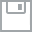
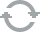
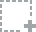
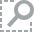
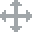
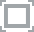
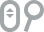
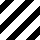
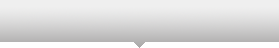
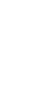
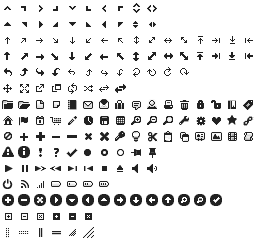
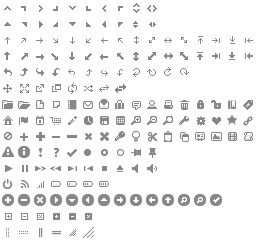
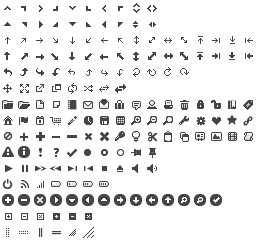
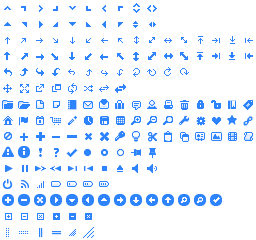
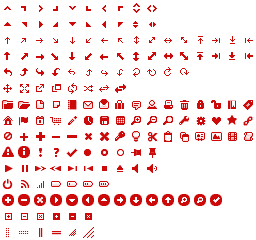
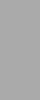
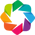
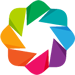

In [2]:
# inputs
# imports
try:
    import seaborn as sns; sns.set_style("white")
except:
    pass

import time
import sys, os

from bokeh.io import output_notebook, show, hplot, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d

output_notebook()

from linetools.spectra.xspectrum1d import XSpectrum1D
from pyigm.continuum import quasar as pycq

In [3]:
def plot_spec(spec, title, xmnx=None, ymnx=None):
    p = figure(plot_width=900, plot_height=500, title=title)
    # Data
    p.line(spec.dispersion.value, spec.flux.value, color='black', line_width=2)
    p.line(spec.dispersion.value, spec.sig, color='red', line_width=0.5)
    # Labels
    p.xaxis.axis_label = "Wavelength"
    p.yaxis.axis_label = "Flux"
    if xmnx is not None:
        p.set(x_range=Range1d(xmnx[0], xmnx[1]))
    if ymnx is not None:
        p.set(y_range=Range1d(ymnx[0], ymnx[1]))
    # Show
    show(p)

## Telfer

### Full

In [4]:
full_telfer = pycq.get_telfer_spec(zqso=2., igm=False, LL_flatten=False)

In [5]:
plot_spec(full_telfer, 'Full Telfer')

### LL kludge + IGM

In [6]:
LL_telfer = pycq.get_telfer_spec(zqso=2., igm=True, LL_flatten=True)

Using P14 spline values to generate a default model
Loading: /Users/xavier/local/Python/pyigm/pyigm/data/fN/fN_spline_z24.fits.gz
linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/morton03_table2.fits.gz
read_sets: Using set file -- 
  /Users/xavier/local/Python/linetools/linetools/lists/sets/llist_v1.0.ascii


In [7]:
plot_spec(LL_telfer, 'Telfer + IGM + LL Kludge')

## WFC3

In [8]:
wfc3, _ = pycq.wfc3_continuum(wfc3_indx=0, zqso=2.)

In [9]:
plot_spec(wfc3, 'WFC3 QSO')

## Full SED $f_\nu$

In [10]:
reload(pycq)
lognu, fnu = pycq.full_nu_spectrum()

In [12]:
p = figure(plot_width=900, plot_height=500, title='Full SED')
# Data
p.line(lognu, np.log10(fnu), color='black', line_width=2)
# Labels
p.xaxis.axis_label = "log nu"
p.yaxis.axis_label = "log f_nu"
# Show
show(p)

In [13]:
nu = 10.**lognu * u.Hz
wave = nu.to(u.AA, equivalencies=u.spectral())
flambda = fnu / wave**2

In [14]:
qso_spec = XSpectrum1D.from_tuple((wave,flambda.value))

In [15]:
plot_spec(qso_spec, 'Full SED (flambda)', xmnx=[300., 3000], ymnx=[0., 5e-6])